In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt

## [Problem 13-1]
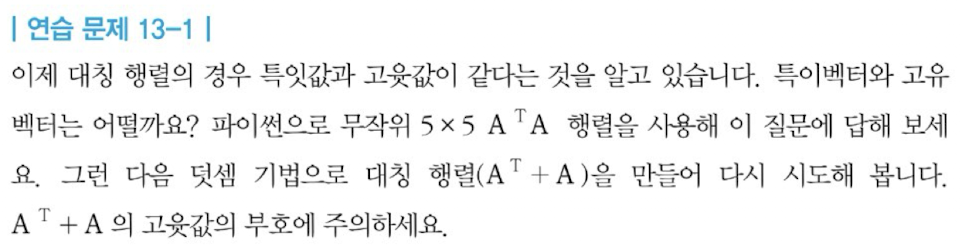

### Random A

In [2]:
A = np.random.randn(5, 5)
A

array([[-0.13764612, -0.36813855, -0.13928927, -0.50944029, -0.59737367],
       [ 0.66580042, -0.5280461 , -0.80817064, -1.72397405, -0.27986412],
       [ 1.47393398, -0.13320748,  0.70967448, -0.40299038,  1.44120556],
       [-0.31190741,  0.69612331,  0.43717998,  1.16229323,  1.88662484],
       [ 0.74086625, -0.02314333, -0.13891116, -2.16900161, -0.49048268]])

### 1-1 $A^T A$: SVD

In [3]:
U1, s1, Vt1 = np.linalg.svd(A.T @ A)
s1

array([13.59079782,  6.52578118,  0.73547167,  0.43338772,  0.06096658])

In [4]:
S1 = np.zeros(np.shape(A.T @ A))
np.fill_diagonal(S1, s1)
S1

array([[13.59079782,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  6.52578118,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.73547167,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.43338772,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.06096658]])

In [5]:
print(U1, '\n\n',Vt1)

[[-0.24440697 -0.58534032 -0.53098144 -0.13264164 -0.54599162]
 [ 0.20709226 -0.03585513  0.42249349  0.62888713 -0.61792187]
 [ 0.21944592 -0.23124443 -0.48045203  0.68094701  0.45149366]
 [ 0.80130822  0.30056929 -0.37330737 -0.24887519 -0.2574218 ]
 [ 0.45511169 -0.71573406  0.4115403  -0.24754694  0.22350215]] 

 [[-0.24440697  0.20709226  0.21944592  0.80130822  0.45511169]
 [-0.58534032 -0.03585513 -0.23124443  0.30056929 -0.71573406]
 [-0.53098144  0.42249349 -0.48045203 -0.37330737  0.4115403 ]
 [-0.13264164  0.62888713  0.68094701 -0.24887519 -0.24754694]
 [-0.54599162 -0.61792187  0.45149366 -0.2574218   0.22350215]]


### 1-2 $A^T A$: EVD

In [6]:
L, V = np.linalg.eig(A.T @ A)
print(L, '\n\n',V)

[13.59079782  6.52578118  0.06096658  0.73547167  0.43338772] 

 [[-0.24440697  0.58534032  0.54599162 -0.53098144  0.13264164]
 [ 0.20709226  0.03585513  0.61792187  0.42249349 -0.62888713]
 [ 0.21944592  0.23124443 -0.45149366 -0.48045203 -0.68094701]
 [ 0.80130822 -0.30056929  0.2574218  -0.37330737  0.24887519]
 [ 0.45511169  0.71573406 -0.22350215  0.4115403   0.24754694]]


$$
U = A A^T\text{의 고유벡터로 구성된 orthogonal matrix}\\
V = A^T A\text{의 고유벡터로 구성된 orthogonal matrix}
$$
- 증명은 수식을 늘어서 쓰면 됨 EZ

In [7]:
print(f'Vt1 =\n{np.round(Vt1, 4)},\n\nV^T =\n{np.round(V.T, 4)}')

# 행별로 보았을 때, 부호가 반대인 경우를 제외하고 동일

Vt1 =
[[-0.2444  0.2071  0.2194  0.8013  0.4551]
 [-0.5853 -0.0359 -0.2312  0.3006 -0.7157]
 [-0.531   0.4225 -0.4805 -0.3733  0.4115]
 [-0.1326  0.6289  0.6809 -0.2489 -0.2475]
 [-0.546  -0.6179  0.4515 -0.2574  0.2235]],

V^T =
[[-0.2444  0.2071  0.2194  0.8013  0.4551]
 [ 0.5853  0.0359  0.2312 -0.3006  0.7157]
 [ 0.546   0.6179 -0.4515  0.2574 -0.2235]
 [-0.531   0.4225 -0.4805 -0.3733  0.4115]
 [ 0.1326 -0.6289 -0.6809  0.2489  0.2475]]


### 2-1: $A^T+A$: SVD

In [8]:
U2, s2, Vt2 = np.linalg.svd(A.T + A)

### 2-2: $A^T+A$: EVD

In [9]:
L2, V2 = np.linalg.eig(A.T + A)
print(L2, '\n\n',V)

[ 2.94890576  2.64061017 -0.64652285 -1.94635381 -1.56505365] 

 [[-0.24440697  0.58534032  0.54599162 -0.53098144  0.13264164]
 [ 0.20709226  0.03585513  0.61792187  0.42249349 -0.62888713]
 [ 0.21944592  0.23124443 -0.45149366 -0.48045203 -0.68094701]
 [ 0.80130822 -0.30056929  0.2574218  -0.37330737  0.24887519]
 [ 0.45511169  0.71573406 -0.22350215  0.4115403   0.24754694]]


In [10]:
print(f'Vt2 =\n{np.round(Vt2, 4)},\n\nV2^T =\n{np.round(V2.T, 4)}')

# 행별로 보았을 때, 부호가 반대인 경우를 제외하고 동일

Vt2 =
[[ 0.3974  0.1087  0.4388 -0.7713  0.207 ]
 [ 0.1642 -0.3365  0.7253  0.5183  0.2551]
 [-0.4677  0.5638  0.5152  0.0122 -0.4449]
 [-0.0304 -0.669   0.109  -0.2347 -0.6961]
 [-0.7717 -0.3309  0.0638 -0.285   0.4579]],

V2^T =
[[-0.3974 -0.1087 -0.4388  0.7713 -0.207 ]
 [-0.1642  0.3365 -0.7253 -0.5183 -0.2551]
 [-0.7717 -0.3309  0.0638 -0.285   0.4579]
 [-0.4677  0.5638  0.5152  0.0122 -0.4449]
 [ 0.0304  0.669  -0.109   0.2347  0.6961]]


---

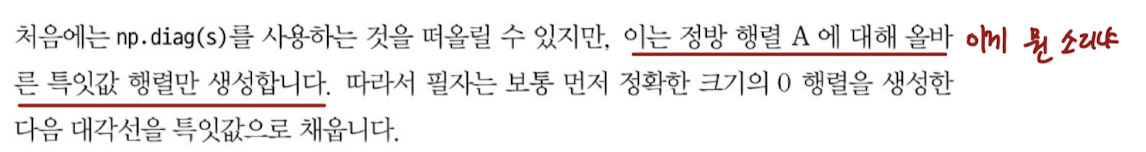

- 다들 위의 빨간 밑줄 문장 이해하셨을까?

In [11]:
np.diag(s1).shape

(5, 5)

In [12]:
B = np.random.randn(5, 4)
Bp = np.column_stack((B, B[:, 3]))
Bp # rank deficient matrix

array([[ 2.97782008, -0.53124523, -0.10792695, -0.06756142, -0.06756142],
       [-0.62178957,  2.87982191,  0.99228249,  0.53915631,  0.53915631],
       [-1.24149096, -0.07099583,  0.77303496, -0.45816098, -0.45816098],
       [-0.22771997, -0.60652344,  1.29171594,  2.65007933,  2.65007933],
       [ 0.26790428,  0.49892846, -0.01432271, -0.9328472 , -0.9328472 ]])

In [13]:
Ub, sb, Vtb = np.linalg.svd(B)


np.diag(sb).shape

(4, 4)

In [14]:
Ubp, sbp, Vtbp = np.linalg.svd(Bp)


np.diag(sbp).shape

(5, 5)

1. `np.diag(s)`와 같이 바로 S 행렬을 생성하는 것은 무조건 Square matrix를 생성해내기 때문에, svd하는 원본 행렬이 Rectangle matrix일 때에도 S가 Square matrix.
  - 틀린 할당( $\because$ S's dimension is mxn)
2. `np.zeros(np.shape(A))`를 활용한다면, vd하는 원본 행렬이 Rectangle matrix일 때에 S가 Rectangle matrix.
  - 정확한 할당

## [Problem 13-2]
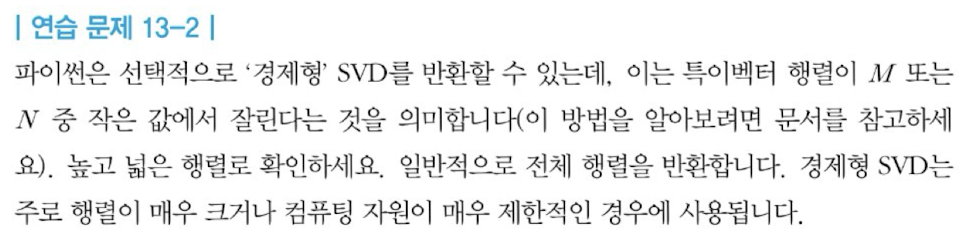

In [15]:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [16]:
M_tall = np.random.randn(5, 4)
M_wide = np.random.randn(4, 5)

In [17]:
U_tall_f, v_tall_f, Vt_tall_f = np.linalg.svd(M_tall)
U_wide_f, v_wide_f, Vt_wide_f = np.linalg.svd(M_wide)

In [18]:
print(f'U_tall: {U_tall_f.shape}')
print(f'v_tall: {v_tall_f.shape}')
print(f'Vt_tall: {Vt_tall_f.shape}')
print()
print(f'U_wide: {U_wide_f.shape}')
print(f'v_wide: {v_wide_f.shape}')
print(f'Vt_wide: {Vt_wide_f.shape}')

U_tall: (5, 5)
v_tall: (4,)
Vt_tall: (4, 4)

U_wide: (4, 4)
v_wide: (4,)
Vt_wide: (5, 5)


In [19]:
U_tall_eco, v_tall_eco, Vt_tall_eco = np.linalg.svd(M_tall, full_matrices=False)
U_wide_eco, v_wide_eco, Vt_wide_eco = np.linalg.svd(M_wide, full_matrices=False)

In [20]:
print(f'U_tall: {U_tall_eco.shape}')
print(f'v_tall: {v_tall_eco.shape}')
print(f'Vt_tall: {Vt_tall_eco.shape}')
print()
print(f'U_wide: {U_wide_eco.shape}')
print(f'v_wide: {v_wide_eco.shape}')
print(f'Vt_wide: {Vt_wide_eco.shape}')

U_tall: (5, 4)
v_tall: (4,)
Vt_tall: (4, 4)

U_wide: (4, 4)
v_wide: (4,)
Vt_wide: (4, 5)


## [Problem 13-7]
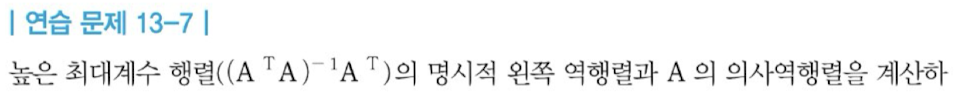
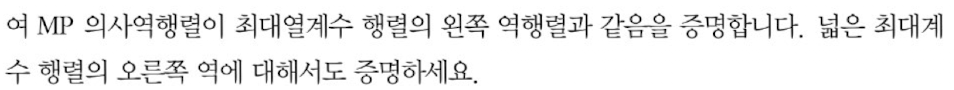

#### 단일 케이스 확인

In [23]:
A = np.random.randn(100, 20)
A.shape

(100, 20)

In [28]:
np.isclose(np.linalg.inv(A.T@A)@A.T, np.linalg.pinv(A)).sum() # 동일

2000

#### Proof 1) A가 Tall matrix이고, full column rank인 경우,

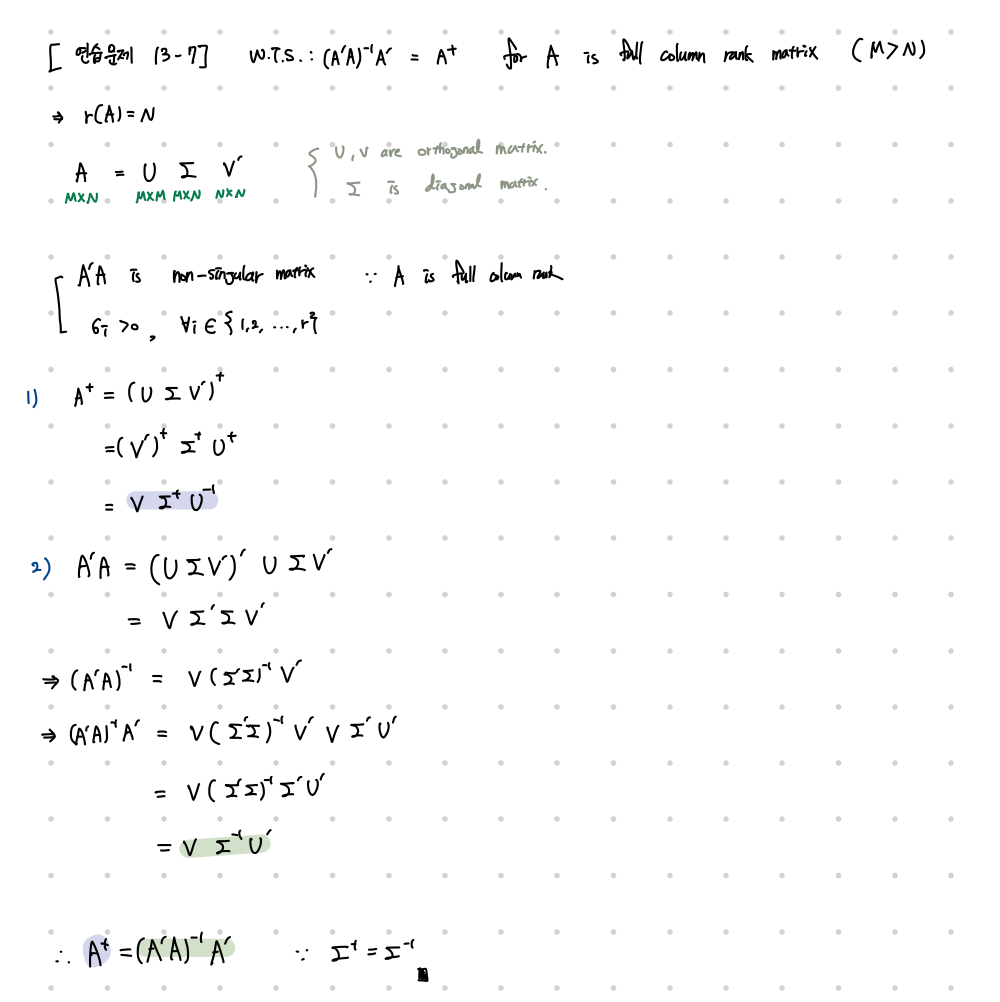

#### Proof 2) A가 Wide matrix이고, full row rank인 경우,

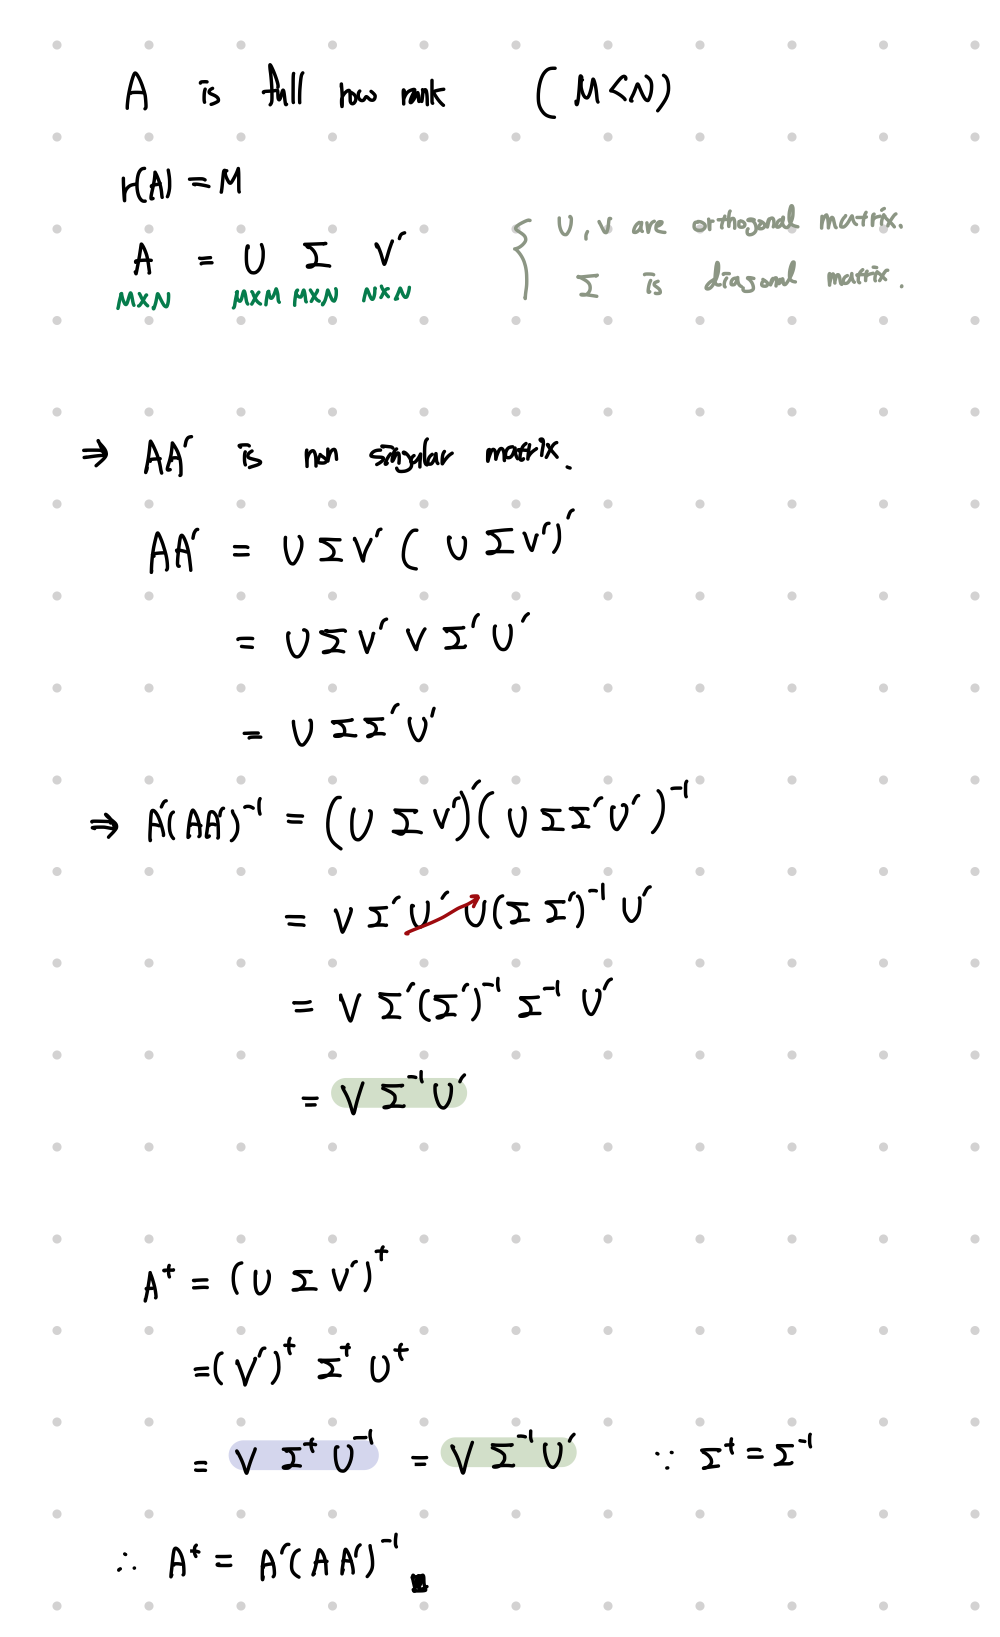

## [Problem 13-5]: Shared Problem
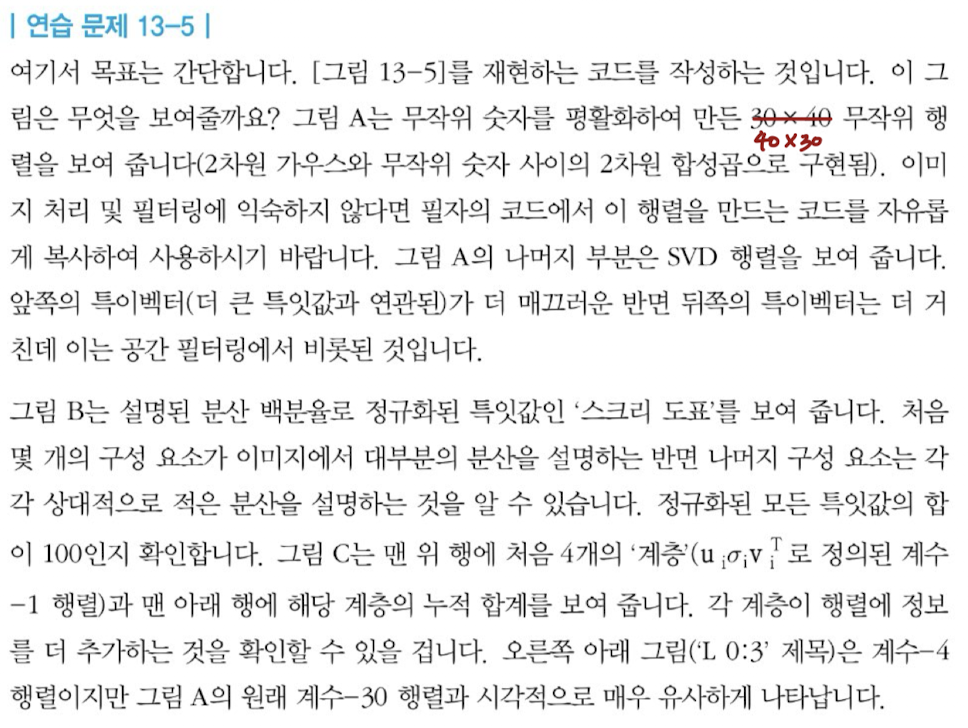
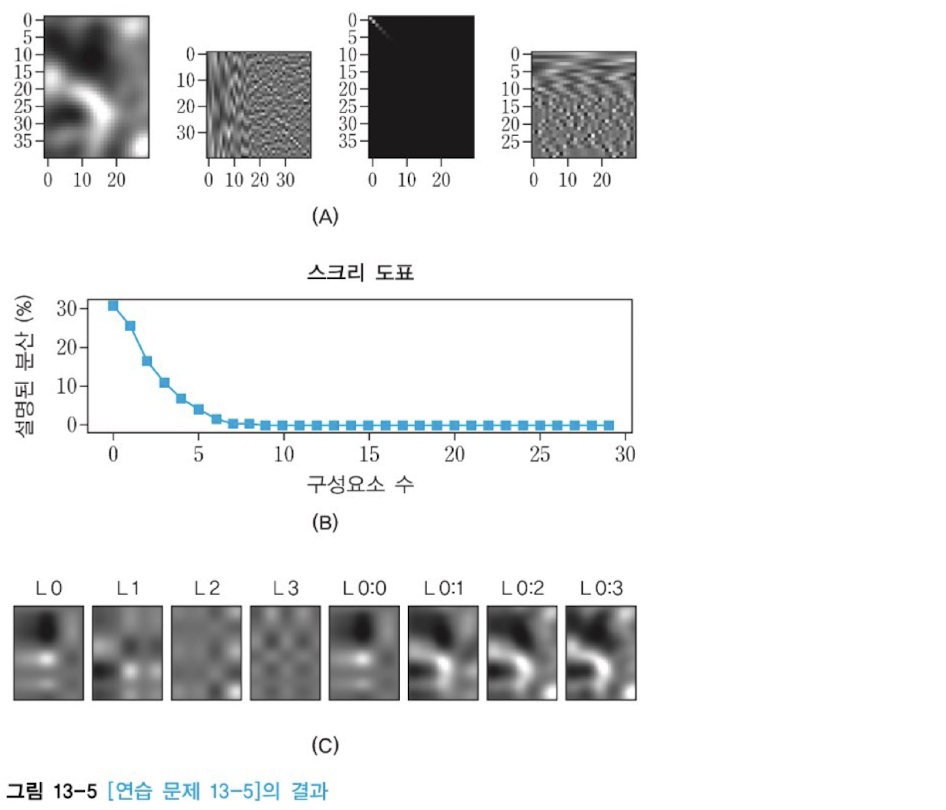

그림 A: 무작위 숫자를 평활화하여 만든 30x40 random matrix (40x30 아닌가?)
- 2D Conv between 2차원 가우스 and 무작위 숫자

그림 B: Scree plot
- 정규화된 모든 특잇값의 합이 100인지 확인

그림 C: Layer를 통한 이미지 압축
- 정보량이 가장 큰 Layer부터 차례대로 4개를 각각 그리고,
- 4개의 누적 합도 보여줘

In [29]:
# create the matrix
m = 40
n = 30

# define a 2D Gaussian for smoothing (평활화)
k = int((m+n)/4)
X,Y = np.meshgrid(np.linspace(-3,3,k),np.linspace(-3,3,k))
g2d = np.exp( -(X**2 + Y**2)/(k/8) )

# now for the matrix
from scipy.signal import convolve2d
A = convolve2d(np.random.randn(m,n),g2d,mode='same')

In [30]:
# SVD
U,s,Vt = np.linalg.svd(A)
S = np.zeros(np.shape(A))
np.fill_diagonal(S,s)

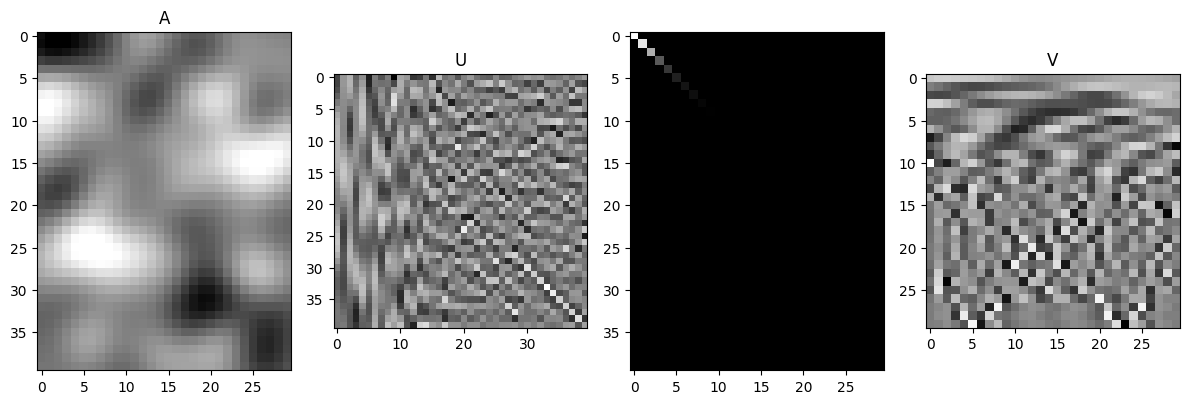

In [35]:
# Visualization
_,axs = plt.subplots(1,4,figsize=(12,6))
axs[0].imshow(A, aspect='equal', cmap='gray', vmin=-10,vmax=10)
axs[0].set_title('A')
axs[1].imshow(U, aspect='equal', cmap='gray')
axs[1].set_title('U')
axs[2].imshow(S, aspect='equal', cmap='gray')
axs[2].set_title('')
axs[3].imshow(Vt, aspect='equal', cmap='gray')
axs[3].set_title('V')

plt.tight_layout()
plt.show()

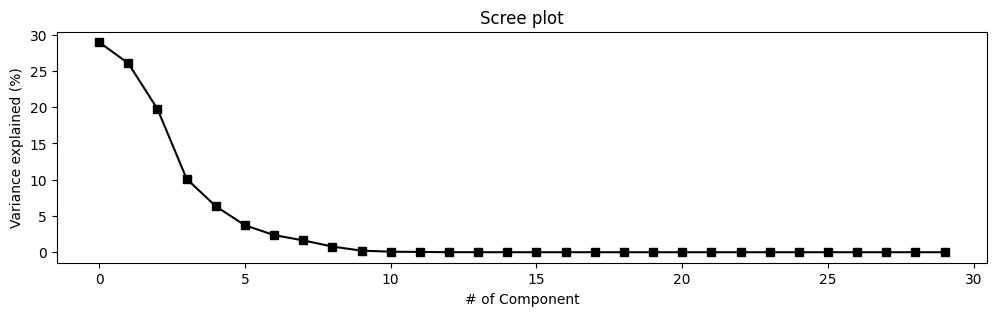

In [36]:
# and show the scree plot
plt.figure(figsize=(12,3))
plt.plot(100*s/np.sum(s),'ks-')
plt.xlabel('# of Component')
plt.ylabel('Variance explained (%)')
plt.title('Scree plot')
plt.show()

In [37]:
U.shape, S.shape, Vt.shape

((40, 40), (40, 30), (30, 30))

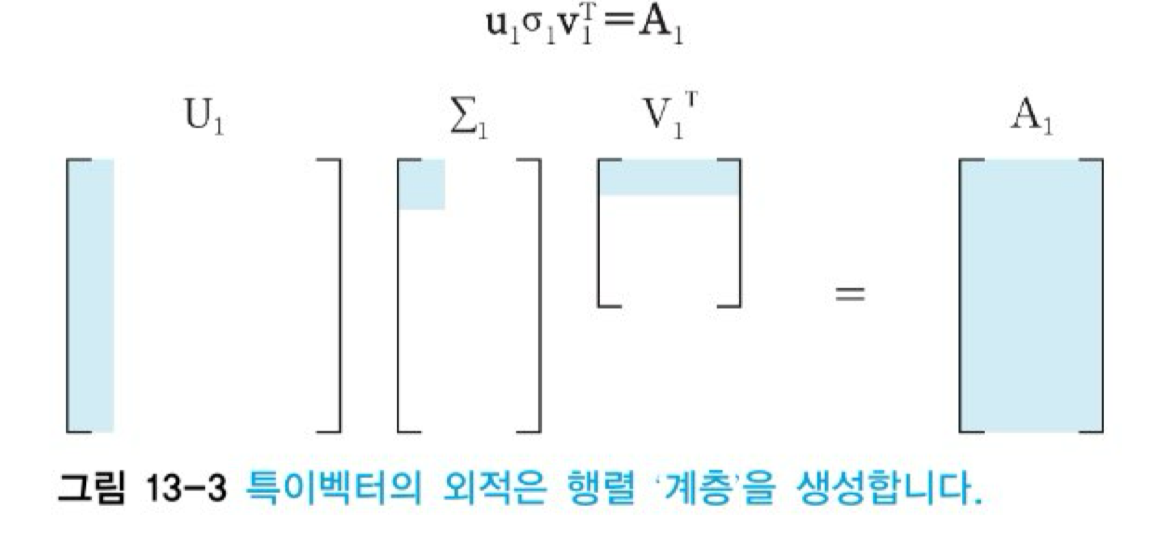

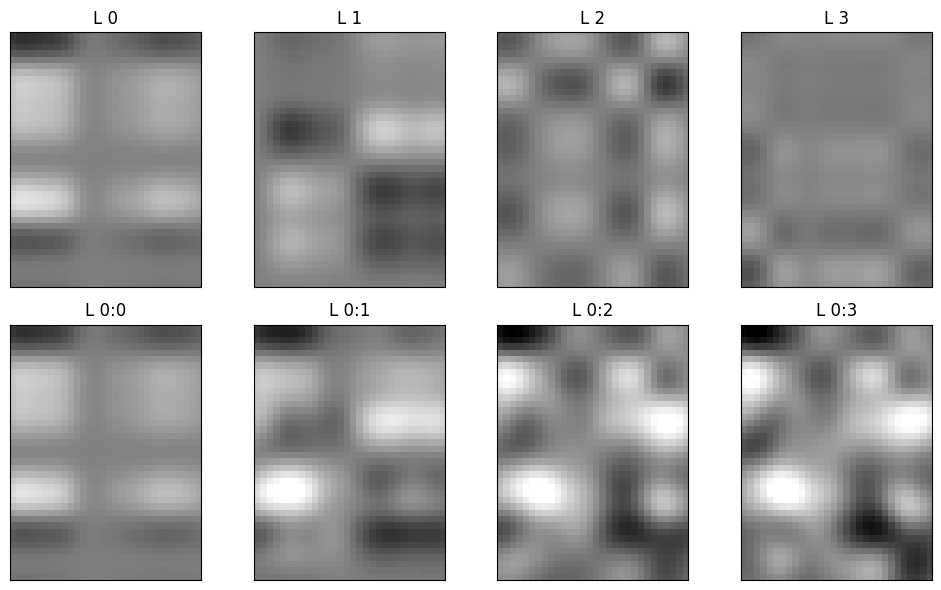

In [38]:
## now show the first N "layers" separately and summed
numLayers = 4
rank1mats = np.zeros((numLayers,m,n))

# setup the figure
_,axs = plt.subplots(2,numLayers,figsize=(10,6))

# the loop
for i in range(numLayers):
  # create this layer
  rank1mats[i,:,:] = np.outer(U[:,i],Vt[i,:])*S[i,i] # 인덱싱을 이렇게 하면 편했구나

  # show this layer
  axs[0,i].imshow(rank1mats[i,:,:],cmap='gray', vmin=-10,vmax=10)
  axs[0,i].set_title(f'L {i}')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])

  # show the cumulative sum of layers
  axs[1,i].imshow(np.sum(rank1mats[:i+1,:,:],axis=0),cmap='gray', vmin=-10,vmax=10)
  axs[1,i].set_title(f'L 0:{i}')
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])

plt.tight_layout()
plt.show()